In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install pendulum

Note: you may need to restart the kernel to use updated packages.


In [4]:
import yfinance as yf
import pendulum
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statistics
from matplotlib import mlab
import datetime as dt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [5]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [6]:
tickers_list=['ASIANPAINT.NS','KANSAINER.NS','BSE-100.BO']

The download method in yahoo finance has the following parameters
    1.ticker : the name of the tickers
    2.period :  the number of days/ months of stock data(the valid frequencies  are 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max)
    3. interval : the frequency of stock market data(the valid intervals are 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo)

Start

In [7]:
#daily data
daily_data=yf.download(tickers=['ASIANPAINT.NS','KANSAINER.NS','BSE-100.BO'],start='2007-01-01',end='2022-01-01' ,interval="1d")['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [8]:
daily_data

,ASIANPAINT.NS,BSE-100.BO,KANSAINER.NS
Date,,,
2007-01-02,63.076504,NaN,20.504845
2007-01-03,63.093548,NaN,20.476656
2007-01-04,63.821724,NaN,20.461279
2007-01-05,63.779167,NaN,20.465122
2007-01-08,62.067223,NaN,20.484341
...,...,...,...
2021-12-27,3227.468506,17360.289062,373.756958
2021-12-28,3321.953369,17512.269531,370.534332
2021-12-29,3321.213623,17485.099609,376.913818


In [9]:
daily_data.dropna(how='any',inplace=True)

In [10]:
daily_data.rename(columns={'KANSAINER.NS':'NEROLAC PAINT','ASIANPAINT.NS':'ASIAN PAINT','BSE-100.BO':'BSE100'},inplace=True)
daily_data

,ASIAN PAINT,BSE100,NEROLAC PAINT
Date,,,
2007-09-17,81.377037,8036.970215,18.931408
2007-09-18,80.481888,8125.430176,18.795921
2007-09-19,80.266716,8425.440430,18.944567
2007-09-20,81.699806,8480.650391,18.920883
2007-09-21,80.477585,8596.559570,18.941933
...,...,...,...
2021-12-27,3227.468506,17360.289062,373.756958
2021-12-28,3321.953369,17512.269531,370.534332
2021-12-29,3321.213623,17485.099609,376.913818


In [12]:
daily_data[['bs100DailyReturns','kansainerDailyReturns','asianpaintDailyReturns',]]=daily_data.iloc[:,0:3].pct_change()

In [13]:
daily_data

,ASIAN PAINT,BSE100,NEROLAC PAINT,bs100DailyReturns,infyDailyReturns,tcsDailyReturns,kansainerDailyReturns,asianpaintDailyReturns
Date,,,,,,,,
2007-09-17,81.377037,8036.970215,18.931408,NaN,NaN,NaN,NaN,NaN
2007-09-18,80.481888,8125.430176,18.795921,-0.011000,0.011007,-0.007157,0.011007,-0.007157
2007-09-19,80.266716,8425.440430,18.944567,-0.002674,0.036922,0.007908,0.036922,0.007908
2007-09-20,81.699806,8480.650391,18.920883,0.017854,0.006553,-0.001250,0.006553,-0.001250
2007-09-21,80.477585,8596.559570,18.941933,-0.014960,0.013667,0.001113,0.013667,0.001113
...,...,...,...,...,...,...,...,...
2021-12-27,3227.468506,17360.289062,373.756958,-0.003775,0.004392,-0.013025,0.004392,-0.013025
2021-12-28,3321.953369,17512.269531,370.534332,0.029275,0.008754,-0.008622,0.008754,-0.008622
2021-12-29,3321.213623,17485.099609,376.913818,-0.000223,-0.001551,0.017217,-0.001551,0.017217


In [14]:
daily_data.dropna(how='any',inplace=True)

In [15]:
#monthly prices data
monthly_data=yf.download(tickers=['ASIANPAINT.NS','KANSAINER.NS','BSE-100.BO'],start='2007-01-01',end='2022-01-01',interval="1mo")['Adj Close']

[*********************100%***********************]  3 of 3 completed


In [16]:
monthly_data

,ASIANPAINT.NS,BSE-100.BO,KANSAINER.NS
Date,,,
2007-01-01,67.786377,NaN,20.380550
2007-02-01,62.774158,NaN,18.008694
2007-03-01,64.950226,NaN,17.196297
2007-04-01,67.995918,NaN,18.909048
2007-05-01,71.370354,NaN,18.415766
...,...,...,...
2021-08-01,3153.670410,17375.210938,406.133759
2021-09-01,3196.325195,17880.570312,415.114502
2021-10-01,3053.928467,17921.269531,357.296783


In [17]:
monthly_data.dropna(how='any',inplace=True)

In [18]:
monthly_data.rename(columns={'KANSAINER.NS':'NEROLAC PAINT','ASIANPAINT.NS':'ASIAN PAINT','BSE-100.BO':'BSE100'},inplace=True)

In [19]:
monthly_data

,ASIAN PAINT,BSE100,NEROLAC PAINT
Date,,,
2007-10-01,88.852417,10391.190430,20.303381
2007-11-01,85.761696,10384.400391,22.888170
2007-12-01,95.251816,11154.280273,23.145990
2008-01-01,107.951447,10705.200195,21.040016
2008-02-01,96.590187,11006.639648,18.415766
...,...,...,...
2021-08-01,3153.670410,17375.210938,406.133759
2021-09-01,3196.325195,17880.570312,415.114502
2021-10-01,3053.928467,17921.269531,357.296783


In [20]:
monthly_data['kansainerMonthlyReturns']= monthly_data['NEROLAC PAINT'].pct_change()
monthly_data['asianpaintMonthlyReturns']= monthly_data['ASIAN PAINT'].pct_change()
monthly_data['bs100MonthlyReturns']= monthly_data['BSE100'].pct_change()

In [21]:
monthly_data


,ASIAN PAINT,BSE100,NEROLAC PAINT,kansainerMonthlyReturns,asianpaintMonthlyReturns,bs100MonthlyReturns
Date,,,,,,
2007-10-01,88.852417,10391.190430,20.303381,NaN,NaN,NaN
2007-11-01,85.761696,10384.400391,22.888170,0.127308,-0.034785,-0.000653
2007-12-01,95.251816,11154.280273,23.145990,0.011264,0.110657,0.074138
2008-01-01,107.951447,10705.200195,21.040016,-0.090987,0.133327,-0.040261
2008-02-01,96.590187,11006.639648,18.415766,-0.124727,-0.105244,0.028158
...,...,...,...,...,...,...
2021-08-01,3153.670410,17375.210938,406.133759,-0.010224,0.082104,0.078637
2021-09-01,3196.325195,17880.570312,415.114502,0.022113,0.013525,0.029085
2021-10-01,3053.928467,17921.269531,357.296783,-0.139281,-0.044550,0.002276


In [22]:
monthly_data.dropna(how='any',inplace=True)


Mean/Expected monthly returns

In [23]:
print("Expected monthly returns of NEROLAC PAINT")
monthly_data['kansainerMonthlyReturns'].mean().round(5)


Expected monthly returns of NEROLAC PAINT


0.02199

In [24]:
print("Expected monthly returns of ASIAN PAINT")
monthly_data['asianpaintMonthlyReturns'].mean().round(5)

Expected monthly returns of ASIAN PAINT


0.02442

In [25]:
print("Expected monthly returns of BSE100")
monthly_data['bs100MonthlyReturns'].mean().round(4)

Expected monthly returns of BSE100


0.0059

In [30]:
print("Expected risk associated with NEROLAC PAINT ")
monthly_data['kansainerMonthlyReturns'].std()

Expected risk associated with NEROLAC PAINT 


0.09656376469191702

In [33]:
print("Expected risk associated with ASIAN PAINT")
monthly_data['asianpaintMonthlyReturns'].std()

Expected risk associated with ASIAN PAINT


0.0769980874077763

In [35]:
print("Expected risk associated with BSE100")
monthly_data['bs100MonthlyReturns'].std()

Expected risk associated with BSE100


0.07220589485309316


Time Plots


In [36]:
from matplotlib import style

Text(0.5, 0, 'Index')

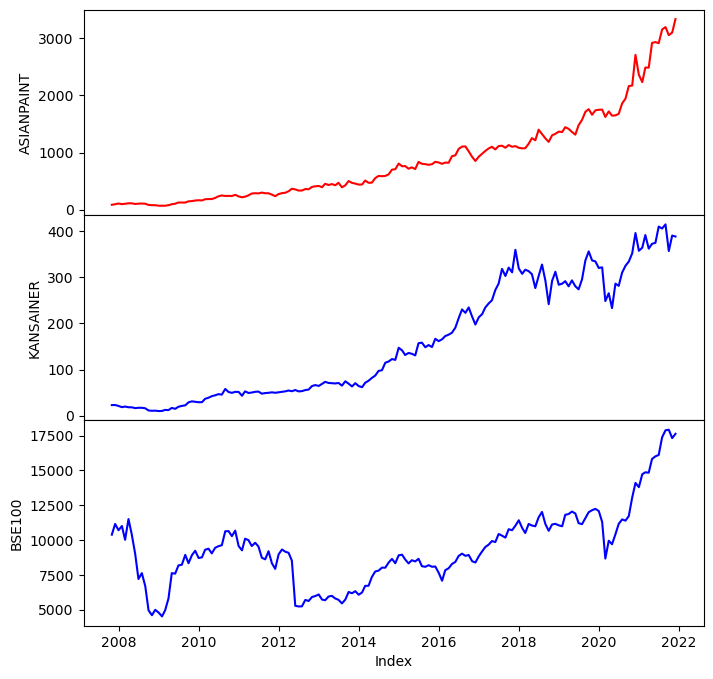

In [39]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,8),nrows=3,sharex=True,subplot_kw=dict(frameon=True)) # frameon=False removes frames
plt.subplots_adjust(hspace=0.0)
ax1.plot(monthly_data.index, monthly_data['ASIAN PAINT'], color='r')
ax1.set_ylabel("ASIANPAINT")
ax2.plot(monthly_data.index,monthly_data['NEROLAC PAINT'] , color='b')
ax2.set_ylabel("KANSAINER")
ax3.plot(monthly_data.index,monthly_data['BSE100'] , color='b')
ax3.set_ylabel("BSE100")
ax3.set_xlabel("Index")

Time plot for monthly returns

Text(0.5, 0, 'Index')

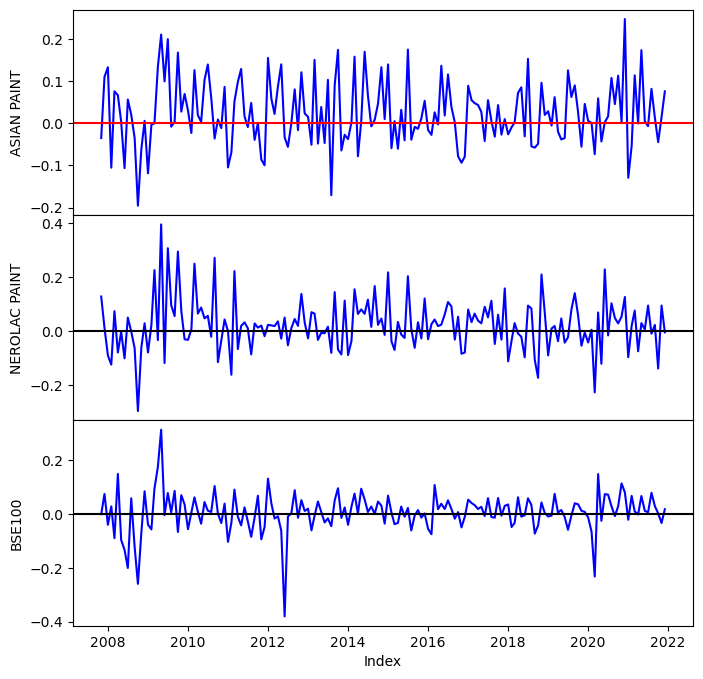

In [40]:
plt.style.use("default")
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,8),nrows=3,sharex=True,subplot_kw=dict(frameon=True)) # frameon=False removes frames
plt.subplots_adjust(hspace=0.0)
ax1.plot(monthly_data.index, monthly_data['asianpaintMonthlyReturns'], color='b')
ax1.axhline(y=0,color='red')
ax1.set_ylabel("ASIAN PAINT")
ax2.plot(monthly_data.index,monthly_data['kansainerMonthlyReturns'] , color='b')
ax2.axhline(y=0,color='black')
ax2.set_ylabel("NEROLAC PAINT")
ax3.plot(monthly_data.index,monthly_data['bs100MonthlyReturns'] , color='b')
ax3.axhline(y=0,color='black')
ax3.set_ylabel("BSE100")
ax3.set_xlabel("Index")

Plotting all three returns on same graph with color variance


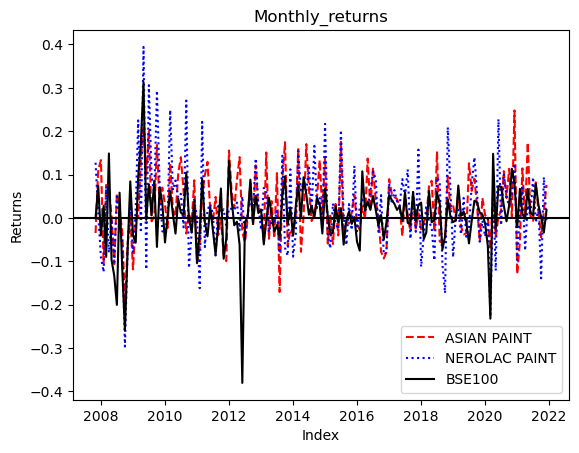

In [41]:
plt.plot(monthly_data['asianpaintMonthlyReturns'],'r--',label="ASIAN PAINT")
plt.plot(monthly_data['kansainerMonthlyReturns'],'b',label="NEROLAC PAINT",linestyle='dotted')
plt.plot(monthly_data['bs100MonthlyReturns'],'k',label="BSE100")
plt.title('Monthly_returns')
plt.legend(loc='lower right')
plt.axhline(y=0,color='black')
plt.xlabel("Index")
plt.ylabel("Returns")
plt.show()

Continuously compounded return monthly

In [42]:
monthly_data['asianpaintCCReturns']=np.log(monthly_data['NEROLAC PAINT']/monthly_data['NEROLAC PAINT'].shift(1))
monthly_data['kansainerCCReturns']=np.log(monthly_data['ASIAN PAINT']/monthly_data['ASIAN PAINT'].shift(1))
monthly_data['bs100CCReturns']=np.log(monthly_data['BSE100']/monthly_data['BSE100'].shift(1))

In [43]:
monthly_data['asianpaintRetDiff']= monthly_data['asianpaintMonthlyReturns'] - monthly_data['asianpaintCCReturns']

Text(0.5, 0, 'Index')

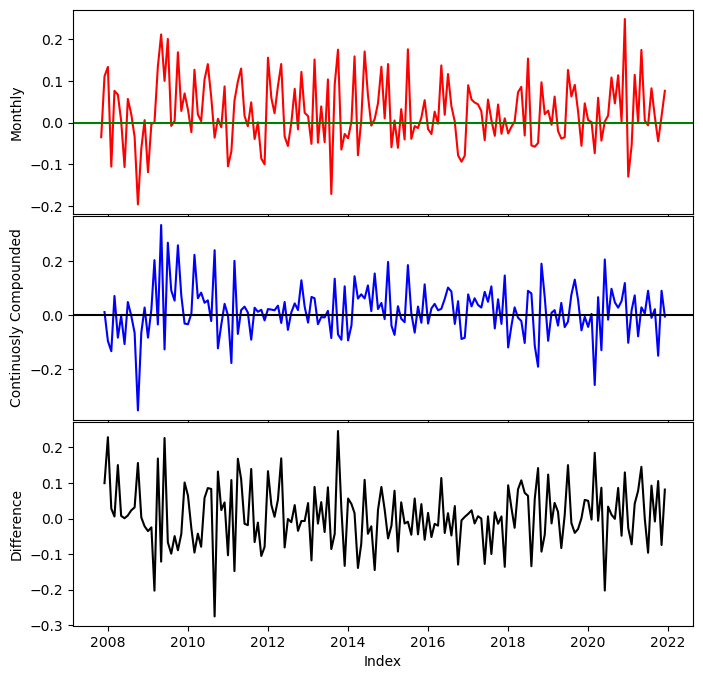

In [45]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,8),nrows=3, sharex=True, subplot_kw=dict(frameon=True)) # frameon=False removes frames
plt.subplots_adjust(hspace=0.01)
ax1.plot(monthly_data.index, monthly_data['asianpaintMonthlyReturns'], color='r',label="Simple returns ASIAN PAINT")
ax1.set_ylabel("Monthly")
ax1.axhline(y=0,color='green')
ax2.plot(monthly_data.index, monthly_data['asianpaintCCReturns'], color='b',label="Continuosly compounded returns ASIAN PAINT")
ax2.set_ylabel("Continuosly Compounded")
ax2.axhline(y=0,color='black')
ax3.plot(monthly_data.index, monthly_data['asianpaintRetDiff'], color='k',label="Difference")
ax3.set_ylabel("Difference")
ax3.set_xlabel("Index")

Plotting Daily Returns


Text(0.5, 0, 'Index')

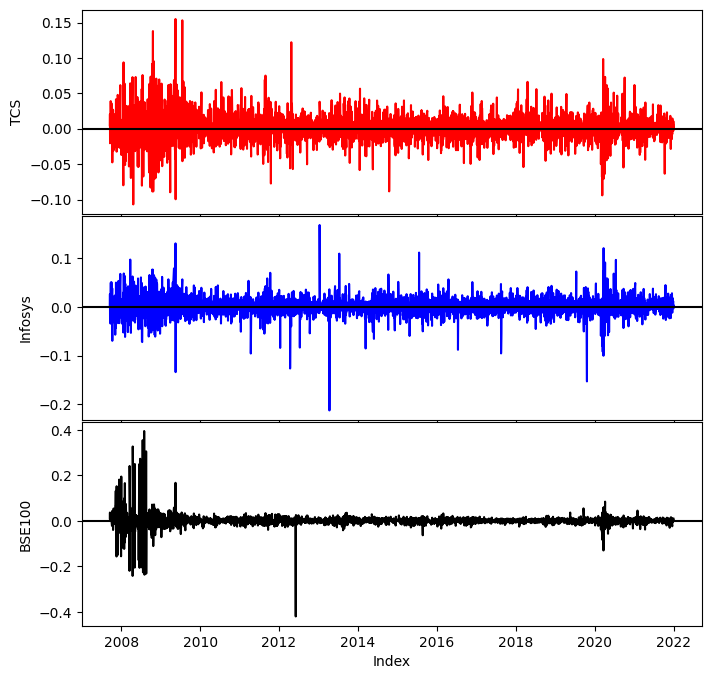

In [ ]:
fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,8),nrows=3, sharex=True, subplot_kw=dict(frameon=True)) # frameon=False removes frames
plt.subplots_adjust(hspace=0.01)
ax1.plot(daily_data.index,daily_data['asianpaintDailyReturns'], color='g',label=" ASIAN PAINT")
ax1.set_ylabel("ASIAN PAINT")
ax1.axhline(y=0,color='black')
ax2.plot(daily_data.index, daily_data['kansainerDailyReturns'], color='b',label="NEROLAC PAINT")
ax2.set_ylabel("")
ax2.axhline(y=0,color='black')
ax3.plot(daily_data.index, daily_data['bs100DailyReturns'], color='k',label="BSE100")
ax3.set_ylabel("BSE100")
ax3.axhline(y=0,color='black')
ax3.set_xlabel("Index")


Plotting equity curves of monthly returns

In [ ]:
TCS_eqtyCurve = np.cumprod(1 + monthly_data['tcsMonthlyReturns'])
infy_eqtyCurve = np.cumprod(1 +  monthly_data['infyMonthlyReturns'])
bs100_eqtyCurve = np.cumprod(1 + monthly_data['bs100MonthlyReturns'])

In [ ]:
TCS_eqtyCurve

Date
2007-11-01     0.977790
2007-12-01     1.040774
2008-01-01     0.844047
2008-02-01     0.850762
2008-03-01     0.785845
                ...    
2021-08-01    19.029063
2021-09-01    18.974284
2021-10-01    17.075626
2021-11-01    17.770016
2021-12-01    18.823383
Freq: MS, Name: tcsMonthlyReturns, Length: 170, dtype: float64

In [ ]:
infy_eqtyCurve

Date
2007-11-01     0.874910
2007-12-01     0.966305
2008-01-01     0.818429
2008-02-01     0.845264
2008-03-01     0.786136
                ...    
2021-08-01     9.904624
2021-09-01     9.723242
2021-10-01     9.680001
2021-11-01    10.028708
2021-12-01    11.054036
Freq: MS, Name: infyMonthlyReturns, Length: 170, dtype: float64

In [ ]:
monthly_data

,BSE100,INFOSYS,TCS,infyMonthlyReturns,tcsMonthlyReturns,bs100MonthlyReturns,tcsCCReturns,infyCCReturns,bs100CCReturns,tcsRetDiff
Date,,,,,,,,,,
2007-11-01,10384.400391,146.248444,191.550125,-0.125090,-0.022210,-0.000653,NaN,NaN,NaN,NaN
2007-12-01,11154.280273,161.525833,203.888718,0.104462,0.064414,0.074138,0.099358,0.062425,0.071519,-0.034944
2008-01-01,10705.200195,136.807281,165.349625,-0.153032,-0.189020,-0.040261,-0.166092,-0.209512,-0.041094,-0.022928
2008-02-01,11006.639648,141.292862,166.665176,0.032788,0.007956,0.028158,0.032262,0.007925,0.027769,-0.024305
2008-03-01,10016.820312,131.409134,153.947800,-0.069952,-0.076305,-0.089929,-0.072519,-0.079373,-0.094233,-0.003786
...,...,...,...,...,...,...,...,...,...,...
2021-08-01,17375.210938,1655.640259,3727.813965,0.059578,0.198034,0.078637,0.057871,0.180682,0.075699,0.140164
2021-09-01,17880.570312,1625.320679,3717.082764,-0.018313,-0.002879,0.029085,-0.018483,-0.002883,0.028670,0.015604
2021-10-01,17921.269531,1618.092651,3345.133545,-0.004447,-0.100065,0.002276,-0.004457,-0.105433,0.002274,-0.095608


In [ ]:
monthly_data['INFY_cumRETURNS']=monthly_data['tcsCCReturns'].cumsum().apply(np.exp)
monthly_data['TCS_cumRETURNS']=monthly_data['infyCCReturns'].cumsum().apply(np.exp)
monthly_data['BSE100_cumRETURNS']=monthly_data['bs100CCReturns'].cumsum().apply(np.exp)

In [ ]:
monthly_data

,BSE100,INFOSYS,TCS,infyMonthlyReturns,tcsMonthlyReturns,bs100MonthlyReturns,tcsCCReturns,infyCCReturns,bs100CCReturns,tcsRetDiff,INFY_cumRETURNS,TCS_cumRETURNS,BSE100_cumRETURNS
Date,,,,,,,,,,,,,
2007-11-01,10384.400391,146.248444,191.550125,-0.125090,-0.022210,-0.000653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-01,11154.280273,161.525833,203.888718,0.104462,0.064414,0.074138,0.099358,0.062425,0.071519,-0.034944,1.104462,1.064414,1.074138
2008-01-01,10705.200195,136.807281,165.349625,-0.153032,-0.189020,-0.040261,-0.166092,-0.209512,-0.041094,-0.022928,0.935444,0.863219,1.030892
2008-02-01,11006.639648,141.292862,166.665176,0.032788,0.007956,0.028158,0.032262,0.007925,0.027769,-0.024305,0.966115,0.870086,1.059921
2008-03-01,10016.820312,131.409134,153.947800,-0.069952,-0.076305,-0.089929,-0.072519,-0.079373,-0.094233,-0.003786,0.898534,0.803695,0.964603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,17375.210938,1655.640259,3727.813965,0.059578,0.198034,0.078637,0.057871,0.180682,0.075699,0.140164,11.320738,19.461297,1.673203
2021-09-01,17880.570312,1625.320679,3717.082764,-0.018313,-0.002879,0.029085,-0.018483,-0.002883,0.028670,0.015604,11.113422,19.405275,1.721868
2021-10-01,17921.269531,1618.092651,3345.133545,-0.004447,-0.100065,0.002276,-0.004457,-0.105433,0.002274,-0.095608,11.063999,17.463489,1.725788


In [ ]:
monthly_data.dropna(inplace=True)
monthly_data

,BSE100,INFOSYS,TCS,infyMonthlyReturns,tcsMonthlyReturns,bs100MonthlyReturns,tcsCCReturns,infyCCReturns,bs100CCReturns,tcsRetDiff,INFY_cumRETURNS,TCS_cumRETURNS,BSE100_cumRETURNS
Date,,,,,,,,,,,,,
2007-12-01,11154.280273,161.525833,203.888718,0.104462,0.064414,0.074138,0.099358,0.062425,0.071519,-0.034944,1.104462,1.064414,1.074138
2008-01-01,10705.200195,136.807281,165.349625,-0.153032,-0.189020,-0.040261,-0.166092,-0.209512,-0.041094,-0.022928,0.935444,0.863219,1.030892
2008-02-01,11006.639648,141.292862,166.665176,0.032788,0.007956,0.028158,0.032262,0.007925,0.027769,-0.024305,0.966115,0.870086,1.059921
2008-03-01,10016.820312,131.409134,153.947800,-0.069952,-0.076305,-0.089929,-0.072519,-0.079373,-0.094233,-0.003786,0.898534,0.803695,0.964603
2008-04-01,11505.790039,159.992615,174.947144,0.217515,0.136406,0.148647,0.196812,0.127870,0.138585,-0.060406,1.093978,0.913323,1.107988
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-01,17375.210938,1655.640259,3727.813965,0.059578,0.198034,0.078637,0.057871,0.180682,0.075699,0.140164,11.320738,19.461297,1.673203
2021-09-01,17880.570312,1625.320679,3717.082764,-0.018313,-0.002879,0.029085,-0.018483,-0.002883,0.028670,0.015604,11.113422,19.405275,1.721868
2021-10-01,17921.269531,1618.092651,3345.133545,-0.004447,-0.100065,0.002276,-0.004457,-0.105433,0.002274,-0.095608,11.063999,17.463489,1.725788


/usr/local/lib/python3.8/dist-packages/IPython/core/events.py:88: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  func(*args, **kwargs)


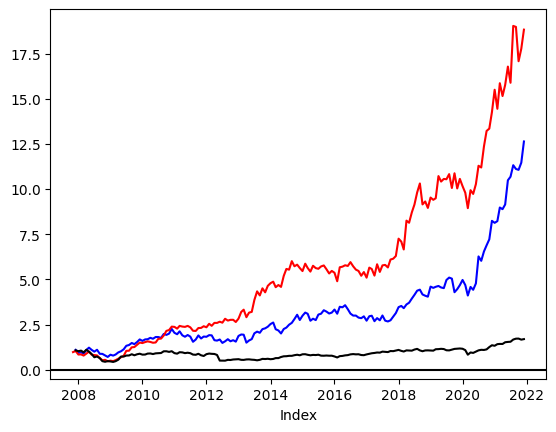

In [ ]:
plt.plot( monthly_data['INFY_cumRETURNS'],color='b',label=" INFOSYS")
plt.plot(TCS_eqtyCurve,color='r',label=" TCS")
plt.plot(monthly_data['BSE100_cumRETURNS'],color='K',label=" BSE100")
plt.xlabel("Index")
plt.axhline(y=0,color='black')

Expected Daily returns and std deviations



In [ ]:
print("Expected daily returns of INFOSYS is")
daily_data['infyDailyReturns'].mean()

Expected daily returns of INFOSYS is


0.0008835584002047371

In [ ]:
print("Expected daily returns of TCS is")
daily_data['tcsDailyReturns'].mean()

Expected daily returns of TCS is


0.0010429796699713766

In [ ]:
print("Expected daily returns of BSE100 is")
daily_data['bs100DailyReturns'].mean().round(4)

Expected daily returns of BSE100 is


0.0006

In [ ]:
print("Expected risk associated with INFOSYS")
daily_data['infyDailyReturns'].std().round(4)

Expected risk associated with INFOSYS


0.0194

In [ ]:
print("Expected risk associated with TCS")
daily_data['tcsDailyReturns'].std().round(4)

Expected risk associated with TCS


0.0195

In [ ]:
print("Expected risk associated with BSE100")
daily_data['bs100DailyReturns'].std().round(4)

Expected risk associated with BSE100


0.0272

In [ ]:
daily_data['infyCCReturns']=np.log(daily_data['INFOSYS']/daily_data['INFOSYS'].shift(1))
daily_data['tcsCCReturns']=np.log(daily_data['TCS']/daily_data['TCS'].shift(1))
daily_data['bs100CCReturns']=np.log(daily_data['BSE100']/daily_data['BSE100'].shift(1))

In [ ]:
daily_data['INFY_cumRETURNS']=daily_data['infyCCReturns'].cumsum().apply(np.exp)
daily_data['TCS_cumRETURNS']=daily_data['tcsCCReturns'].cumsum().apply(np.exp)
daily_data['BSE100_cumRETURNS']=daily_data['bs100CCReturns'].cumsum().apply(np.exp)

In [ ]:
daily_data

,BSE100,INFOSYS,TCS,bs100DailyReturns,infyDailyReturns,tcsDailyReturns,infyCCReturns,tcsCCReturns,bs100CCReturns,INFY_cumRETURNS,TCS_cumRETURNS,BSE100_cumRETURNS
Date,,,,,,,,,,,,
2007-09-18,8125.430176,164.165314,189.191803,0.011007,-0.000138,0.004812,NaN,NaN,NaN,NaN,NaN,NaN
2007-09-19,8425.440430,168.445602,193.079575,0.036922,0.026073,0.020549,0.025739,0.020341,0.036257,1.026073,1.020549,1.036922
2007-09-20,8480.650391,163.787781,189.116318,0.006553,-0.027652,-0.020527,-0.028041,-0.020740,0.006531,0.997700,0.999601,1.043717
2007-09-21,8596.559570,166.107605,192.088806,0.013667,0.014164,0.015718,0.014064,0.015596,0.013575,1.011831,1.015313,1.057982
2007-09-24,8751.830078,160.389923,190.097687,0.018062,-0.034422,-0.010366,-0.035028,-0.010420,0.017901,0.977003,1.004788,1.077091
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,17360.289062,1826.631226,3645.845459,0.004392,0.001422,0.006865,0.001421,0.006841,0.004383,11.126779,19.270631,2.136538
2021-12-28,17512.269531,1848.018677,3656.153320,0.008754,0.011709,0.002827,0.011641,0.002823,0.008716,11.257059,19.325115,2.155242
2021-12-29,17485.099609,1845.620483,3644.464111,-0.001551,-0.001298,-0.003197,-0.001299,-0.003202,-0.001553,11.242451,19.263330,2.151898


Histograms

In [ ]:
from matplotlib import pyplot as plt


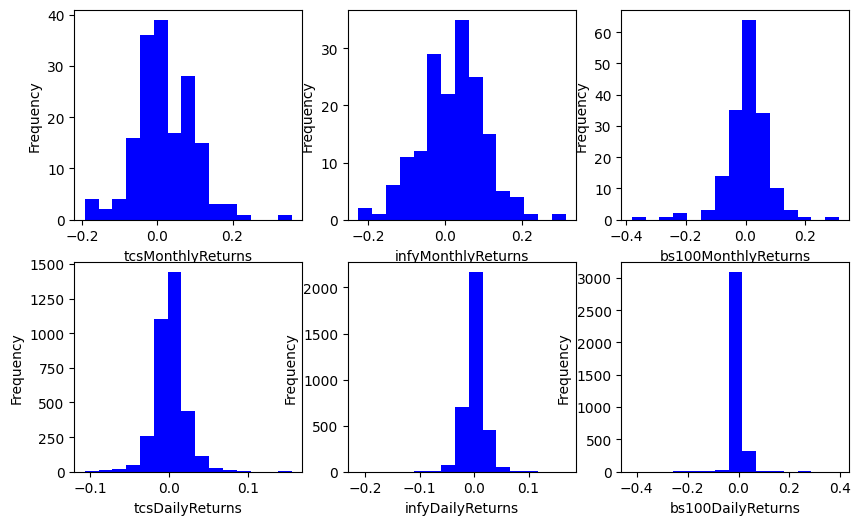

In [ ]:
plt.subplots(figsize=(10,6))
plt.subplot(231)

monthly_data['tcsMonthlyReturns'].hist(color="blue",bins=15)
plt.xlabel("tcsMonthlyReturns")
plt.ylabel("Frequency")
plt.grid(False)
plt.subplot(232)
monthly_data['infyMonthlyReturns'].hist(color="blue",bins=15)
plt.xlabel("infyMonthlyReturns")
plt.ylabel("Frequency")
plt.grid(False)
plt.subplot(233)
monthly_data['bs100MonthlyReturns'].hist(color="blue",bins=15)
plt.xlabel("bs100MonthlyReturns")
plt.ylabel("Frequency")
plt.grid(False)
plt.subplot(234)
daily_data['tcsDailyReturns'].hist(color="blue",bins=15)
plt.xlabel("tcsDailyReturns")
plt.ylabel("Frequency")
plt.grid(False)
plt.subplot(235)
daily_data['infyDailyReturns'].hist(color="blue",bins=15)
plt.xlabel("infyDailyReturns")
plt.ylabel("Frequency")
plt.grid(False)
plt.subplot(236)
daily_data['bs100DailyReturns'].hist(color="blue",bins=15)
plt.xlabel("bs100DailyReturns")
plt.ylabel("Frequency")
plt.grid(False)
fig.tight_layout(pad=7)


Checking for normal distribution of data

In [ ]:
import random 
random.seed(123)

In [ ]:
mu=daily_data['tcsDailyReturns'].mean().round(4)
sigma=daily_data['tcsDailyReturns'].std().round(4)

tcs_gwnDaily =  np.random.normal(daily_data['tcsDailyReturns'].mean().round(4),daily_data['tcsDailyReturns'].std().round(4),size=len(daily_data['tcsDailyReturns'])) 
tcs_gwnMonthly = np.random.normal(monthly_data['tcsMonthlyReturns'].mean().round(4),monthly_data['tcsMonthlyReturns'].std().round(4),size=len(monthly_data['tcsMonthlyReturns']))

#creating simulated data 
infosys_gwnDaily = np.random.normal(daily_data['infyDailyReturns'].mean().round(4),daily_data['infyDailyReturns'].std().round(4),size=len(daily_data['infyDailyReturns']))
infosys_gwnMonthly = np.random.normal(monthly_data['infyMonthlyReturns'].mean().round(4),monthly_data['infyMonthlyReturns'].std().round(4),size=len(monthly_data['infyMonthlyReturns']))


In [ ]:
bs100_gwnDaily = np.random.normal(daily_data['bs100DailyReturns'].mean().round(4),daily_data['bs100DailyReturns'].std().round(4),size=len(daily_data['bs100DailyReturns']))
bs100_gwnMonthly = np.random.normal(monthly_data['bs100MonthlyReturns'].mean().round(4),monthly_data['bs100MonthlyReturns'].std().round(4),size=len(monthly_data['bs100MonthlyReturns']))


In [ ]:
gwn_Daily=pd.DataFrame({'tcs_gwnDaily': tcs_gwnDaily, 'infosys_gwnDaily':infosys_gwnDaily,'bs100_gwnDaily':bs100_gwnDaily}, columns=['tcs_gwnDaily','infosys_gwnDaily','bs100_gwnDaily'],index=daily_data.index)
gwn_Daily

,tcs_gwnDaily,infosys_gwnDaily,bs100_gwnDaily
Date,,,
2007-09-18,-0.007296,0.003118,-0.045967
2007-09-19,-0.013231,0.010064,-0.023955
2007-09-20,-0.011562,-0.012452,-0.006066
2007-09-21,0.021857,-0.004437,-0.043802
2007-09-24,-0.008596,0.038976,0.020394
...,...,...,...
2021-12-27,-0.041219,0.007024,0.059018
2021-12-28,-0.024479,0.004623,0.043803
2021-12-29,0.010051,0.006267,0.027862


In [ ]:
gwn_Monthly=pd.DataFrame({'tcs_gwnMonthly': tcs_gwnMonthly, 'infosys_gwnMonthly':infosys_gwnMonthly,'bs100_gwnMonthly':bs100_gwnMonthly}, columns=['tcs_gwnMonthly','infosys_gwnMonthly','bs100_gwnMonthly'],index=monthly_data.index)
gwn_Monthly

,tcs_gwnMonthly,infosys_gwnMonthly,bs100_gwnMonthly
Date,,,
2007-12-01,0.099060,0.080258,-0.094603
2008-01-01,0.095874,0.056060,0.004618
2008-02-01,0.129884,-0.044311,0.086343
2008-03-01,-0.062563,-0.073455,0.067705
2008-04-01,-0.068886,0.022062,0.038913
...,...,...,...
2021-08-01,0.108773,0.071052,0.073086
2021-09-01,-0.006019,0.032286,0.044507
2021-10-01,-0.050909,-0.022799,0.030581


In [ ]:
#checking if any null values in data
gwn_Daily.isnull().sum()

tcs_gwnDaily        0
infosys_gwnDaily    0
bs100_gwnDaily      0
dtype: int64

Text(0, 0.5, 'Frequency')

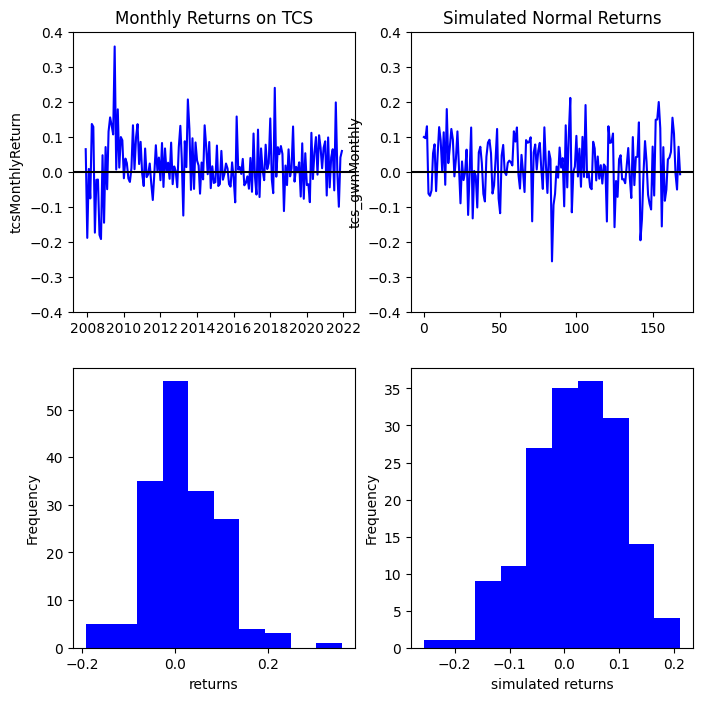

In [ ]:
plt.subplots(figsize=(8,8))
plt.subplot(221)
plt.plot(monthly_data["tcsMonthlyReturns"],color="blue")
plt.axhline(y=0,color='black')
plt.title("Monthly Returns on TCS")
plt.ylabel("tcsMonthlyReturn")
plt.ylim([-0.4,0.4])

plt.subplot(222)
plt.plot(tcs_gwnMonthly,color="blue")
plt.axhline(y=0,color='black')
plt.title("Simulated Normal Returns")
plt.ylabel("tcs_gwnMonthly")
plt.ylim([-0.4,0.4])

#Histograms
plt.subplot(223)
plt.hist(monthly_data['tcsMonthlyReturns'],color="blue")
plt.xlabel("returns")
plt.ylabel("Frequency")

plt.subplot(224)
plt.hist(tcs_gwnMonthly,color="blue")
plt.xlabel("simulated returns")
plt.ylabel("Frequency")






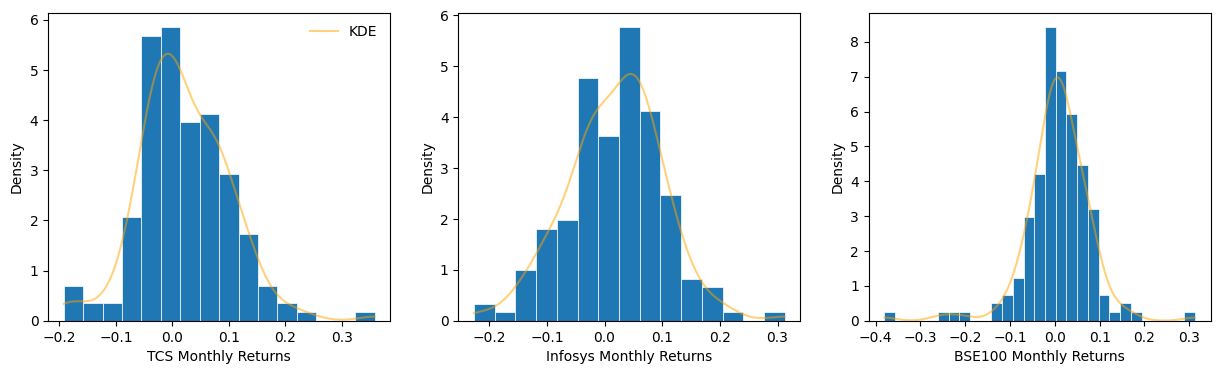

In [ ]:
#  seaborn histogram overlaid with KDE
plt.subplots(figsize=(15,4))
plt.subplot(131)
ax = sns.histplot(data=monthly_data['tcsMonthlyReturns'], stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='orange', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('orange') # edit line color due to bug in sns v 0.11.0
ax.set_xlabel("TCS Monthly Returns")
# Edit legemd and add title
ax.legend(frameon=False)


plt.subplot(132)
ax = sns.histplot(data=monthly_data['infyMonthlyReturns'], stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='orange', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('orange') # edit line color due to bug in sns v 0.11.0
ax.set_xlabel("Infosys Monthly Returns")

plt.subplot(133)
ax = sns.histplot(data=monthly_data['bs100MonthlyReturns'], stat='density', alpha= 1, kde=True,
                  edgecolor='white', linewidth=0.5,
                  line_kws=dict(color='orange', alpha=0.5, linewidth=1.5, label='KDE'))
ax.get_lines()[0].set_color('orange') # edit line color due to bug in sns v 0.11.0
ax.set_xlabel("BSE100 Monthly Returns")



plt.show()

Quantiles of Returns

In [ ]:
monthly_data["tcsMonthlyReturns"].quantile()
monthly_data["tcsMonthlyReturns"].quantile([0.01,0.05])




0.01   -0.183224
0.05   -0.087307
Name: tcsMonthlyReturns, dtype: float64

In [ ]:
#infosys quantiles
print(monthly_data["infyMonthlyReturns"].quantile(q=[0.25,0.5,0.75,1]))
print(monthly_data["infyMonthlyReturns"].quantile([0.01,0.05]))

0.25   -0.033066
0.50    0.026928
0.75    0.068638
1.00    0.312589
Name: infyMonthlyReturns, dtype: float64
0.01   -0.170283
0.05   -0.118959
Name: infyMonthlyReturns, dtype: float64


In [ ]:
#s&p quantiles
print(monthly_data["bs100MonthlyReturns"].quantile(q=[0.25,0.5,0.75,1]))
print(monthly_data["bs100MonthlyReturns"].quantile([0.01,0.05]))

0.25   -0.025459
0.50    0.006959
0.75    0.042906
1.00    0.312917
Name: bs100MonthlyReturns, dtype: float64
0.01   -0.241083
0.05   -0.092484
Name: bs100MonthlyReturns, dtype: float64


Median and IQR

In [ ]:
#monthly data
print(monthly_data["tcsMonthlyReturns"].median())
print(monthly_data["infyMonthlyReturns"].median())
print(monthly_data["bs100MonthlyReturns"].median())


0.011755409435168618
0.026928036588124593
0.006958676194485536


In [ ]:
#IQR
Q1, Q3 = monthly_data["tcsMonthlyReturns"].quantile([.25, .75])
iqr = Q3 - Q1
print(iqr)

0.1003027120861012


In [ ]:
#IQR
Q1, Q3 = monthly_data["infyMonthlyReturns"].quantile([.25, .75])
iqr = Q3 - Q1
print(iqr)

0.10170425441629694


In [ ]:
#IQR
Q1, Q3 = monthly_data["bs100MonthlyReturns"].quantile([.25, .75])
iqr = Q3 - Q1
print(iqr)

0.06836492842332709


Value at Risk

In [ ]:
W = 100000
tcsQuantiles = monthly_data["tcsMonthlyReturns"].quantile([0.01, 0.05])

infyQuantiles = monthly_data["infyMonthlyReturns"].quantile([0.01, 0.05])
bs100Quantiles = monthly_data["bs100MonthlyReturns"].quantile([0.01, 0.05])
tcsVaR = W*tcsQuantiles
infyVaR = W*infyQuantiles
bs100VaR = W*bs100Quantiles

print(tcsVaR)
print(infyVaR)
print(bs100VaR)

0.01   -18322.441250
0.05    -8730.671327
Name: tcsMonthlyReturns, dtype: float64
0.01   -17028.274195
0.05   -11895.914243
Name: infyMonthlyReturns, dtype: float64
0.01   -24108.258950
0.05    -9248.402621
Name: bs100MonthlyReturns, dtype: float64


In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install statistics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7453 sha256=52e56b69a9ace61ec50e78310273567ee4e8bfb15a4bbfe264b24cb2bea037c0
  Stored in directory: /root/.cache/pip/wheels/36/4b/c7/6af97584669b756c0d60c5ff05d5fb1f533a4e4d96e5ee92b9
Successfully built statistics


In [ ]:
pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from scipy import stats

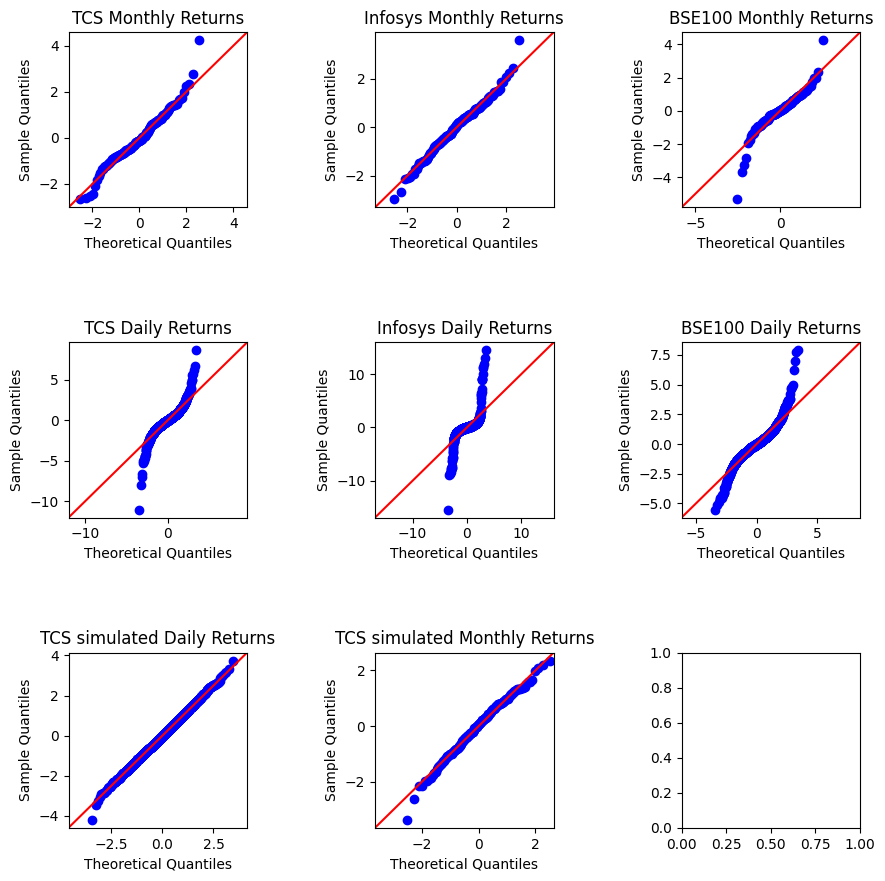

In [ ]:
import statsmodels.api as sm
fig, axes = plt.subplots(ncols=3, nrows=3 ,figsize=(10,10))
a=np.ravel(axes)

sm.qqplot(monthly_data.iloc[1:,4],line='45',fit=True,dist=stats.norm,ax=a[0])
a[0].set_title('TCS Monthly Returns')

sm.qqplot(monthly_data.iloc[1:,3],line='45',fit=True,dist=stats.norm,ax=a[1])
a[1].set_title("Infosys Monthly Returns")

#S&P500_RETURNS has column number 5

sm.qqplot(monthly_data.iloc[1:,5],line='45',fit=True,dist=stats.norm,ax=a[2])
a[2].set_title("BSE100 Monthly Returns")

#daily returns
#TCS_RETURNS has column number 4

sm.qqplot(daily_data.iloc[1:,4],line='45',fit=True,dist=stats.norm,ax=a[3])
a[3].set_title("TCS Daily Returns")


#INFY_RETURNS has column number 3

sm.qqplot(daily_data.iloc[1:,3],line='45',fit=True,dist=stats.norm,ax=a[4])
a[4].set_title("Infosys Daily Returns")


#S&P500_RETURNS has column number 5

sm.qqplot(daily_data.iloc[1:,5],line='45',fit=True,dist=stats.norm,ax=a[5])
a[5].set_title("BSE100 Daily Returns")


#TCS daily simulated returns

sm.qqplot(tcs_gwnDaily,line='45',fit=True,dist=stats.norm,ax=a[6])
a[6].set_title("TCS simulated Daily Returns")
#TCS monthly simulated returns

sm.qqplot(tcs_gwnMonthly,line='45',fit=True,dist=stats.norm,ax=a[7])
a[7].set_title("TCS simulated Monthly Returns")


fig.tight_layout(pad=5.0)
 
plt.show()

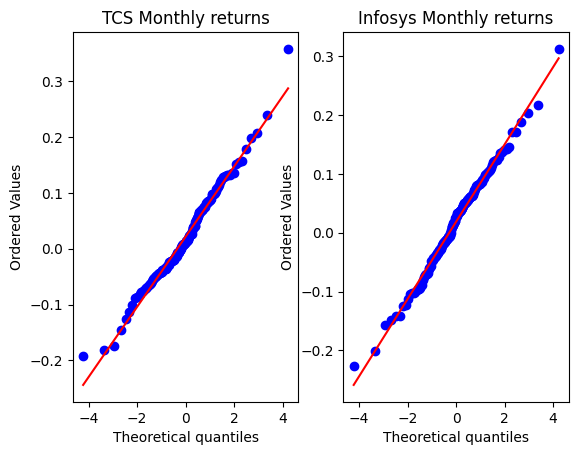

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
#tcs monthly returns
stats.probplot(monthly_data.iloc[2:,4], dist=stats.t(df=5), plot=ax1)
ax1.set_title("TCS Monthly returns")
ax2 = fig.add_subplot(122)
stats.probplot(monthly_data.iloc[2:,3], dist=stats.t(df=5), plot=ax2)
ax2.set_title("Infosys Monthly returns")
plt.show()

In [ ]:
df=pd.DataFrame(monthly_data[["tcsMonthlyReturns","infyMonthlyReturns","bs100MonthlyReturns"]])


In [ ]:
print(df.describe())
print("Variance:\n",df.var())
print("Standard deviation:\n",df.std())
print("Skewness:\n",df.skew())
print("Kurtosis:\n",df.kurt())

       tcsMonthlyReturns  infyMonthlyReturns  bs100MonthlyReturns
count         169.000000          169.000000           169.000000
mean            0.020720            0.018479             0.005921
std             0.079664            0.082434             0.072419
min            -0.192458           -0.226314            -0.380440
25%            -0.029786           -0.033066            -0.025459
50%             0.011755            0.026928             0.006959
75%             0.070517            0.068638             0.042906
max             0.357835            0.312589             0.312917
Variance:
 tcsMonthlyReturns      0.006346
infyMonthlyReturns     0.006795
bs100MonthlyReturns    0.005244
dtype: float64
Standard deviation:
 tcsMonthlyReturns      0.079664
infyMonthlyReturns     0.082434
bs100MonthlyReturns    0.072419
dtype: float64
Skewness:
 tcsMonthlyReturns      0.383663
infyMonthlyReturns    -0.036179
bs100MonthlyReturns   -0.946737
dtype: float64
Kurtosis:
 tcsMonthlyReturns  

In [ ]:
#daily statistics
df_daily=pd.DataFrame(daily_data[["tcsDailyReturns","infyDailyReturns","bs100DailyReturns"]])

In [ ]:
print(df_daily.describe())
print("Variance:\n",df_daily.var())
print("Standard deviation:\n",df_daily.std())
print("Skewness:\n",df_daily.skew())
print("Kurtosis:\n",df_daily.kurt())

       tcsDailyReturns  infyDailyReturns  bs100DailyReturns
count      3489.000000       3489.000000        3489.000000
mean          0.001043          0.000884           0.000596
std           0.019537          0.019415           0.027216
min          -0.106905         -0.212586          -0.419366
25%          -0.008493         -0.008534          -0.005747
50%           0.000621          0.000644           0.000784
75%           0.010416          0.010310           0.006885
max           0.154957          0.167851           0.394943
Variance:
 tcsDailyReturns      0.000382
infyDailyReturns     0.000377
bs100DailyReturns    0.000741
dtype: float64
Standard deviation:
 tcsDailyReturns      0.019537
infyDailyReturns     0.019415
bs100DailyReturns    0.027216
dtype: float64
Skewness:
 tcsDailyReturns      0.362035
infyDailyReturns    -0.298863
bs100DailyReturns    1.492603
dtype: float64
Kurtosis:
 tcsDailyReturns       6.179926
infyDailyReturns     11.533265
bs100DailyReturns    78.39995

Effect of outliers


In [ ]:
gwn_Monthly.describe()

,tcs_gwnMonthly,infosys_gwnMonthly,bs100_gwnMonthly
count,169.000000,169.000000,169.000000
mean,0.018583,0.021073,0.010716
std,0.081912,0.087172,0.069144
min,-0.256079,-0.197221,-0.225484
25%,-0.038314,-0.040032,-0.038182
50%,0.024480,0.020711,0.011814
75%,0.082387,0.081051,0.060929
max,0.210922,0.289351,0.164126


In [ ]:
print(gwn_Monthly.describe())
print("Variance:\n",gwn_Monthly.var())
print("Standard deviation:\n",gwn_Monthly.std())
print("Skewness:\n",gwn_Monthly.skew())
print("Kurtosis:\n",gwn_Monthly.kurt())


       tcs_gwnMonthly  infosys_gwnMonthly  bs100_gwnMonthly
count      169.000000          169.000000        169.000000
mean         0.018583            0.021073          0.010716
std          0.081912            0.087172          0.069144
min         -0.256079           -0.197221         -0.225484
25%         -0.038314           -0.040032         -0.038182
50%          0.024480            0.020711          0.011814
75%          0.082387            0.081051          0.060929
max          0.210922            0.289351          0.164126
Variance:
 tcs_gwnMonthly        0.006710
infosys_gwnMonthly    0.007599
bs100_gwnMonthly      0.004781
dtype: float64
Standard deviation:
 tcs_gwnMonthly        0.081912
infosys_gwnMonthly    0.087172
bs100_gwnMonthly      0.069144
dtype: float64
Skewness:
 tcs_gwnMonthly       -0.335507
infosys_gwnMonthly    0.051766
bs100_gwnMonthly     -0.474145
dtype: float64
Kurtosis:
 tcs_gwnMonthly        0.109653
infosys_gwnMonthly    0.144562
bs100_gwnMonthly    

In [ ]:
tcs_gwnMonthlyOutlier =gwn_Monthly["tcs_gwnMonthly"]
infy_gwnMonthlyOutlier = gwn_Monthly["infosys_gwnMonthly"]
bs100_gwnMonthlyOutlier = gwn_Monthly["bs100_gwnMonthly"]

In [ ]:
tcs_gwnMonthlyOutlier[20] = (gwn_Monthly["tcs_gwnMonthly"].std()*(-6)).round(4)
infy_gwnMonthlyOutlier[20] = (gwn_Monthly["infosys_gwnMonthly"].std()*(-6)).round(4)
bs100_gwnMonthlyOutlier[20] = (gwn_Monthly["bs100_gwnMonthly"].std()*(-6)).round(4)

Text(0.5, 0, 'Index')

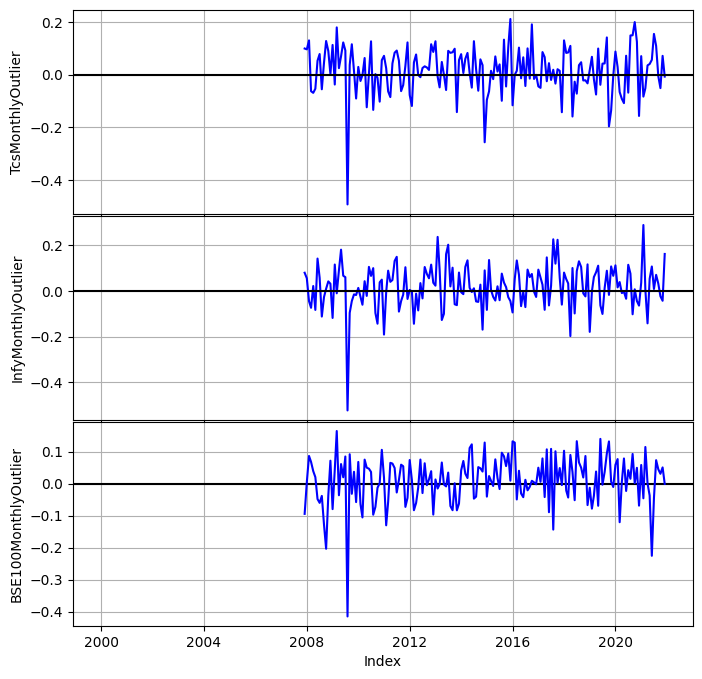

In [ ]:
w = gwn_Monthly.index
x = tcs_gwnMonthlyOutlier
y = infy_gwnMonthlyOutlier
z = bs100_gwnMonthlyOutlier

fig, (ax1,ax2,ax3) = plt.subplots(figsize=(8,8),nrows=3, sharex=True, subplot_kw=dict(frameon=True)) # frameon=False removes frames
plt.axhline(y=0,color='black')
plt.subplots_adjust(hspace=0.01)


ax1.grid()
ax2.grid()
ax3.grid()


ax1.plot(w, x, color='b')
ax1.set_ylabel("TcsMonthlyOutlier")
ax1.axhline(y=0,color='black')

ax2.plot(w, y, color='b')
ax2.set_ylabel("InfyMonthlyOutlier")
ax2.axhline(y=0,color='black')

ax3.plot(w, z, color='b')
ax3.set_ylabel("BSE100MonthlyOutlier")

ax3.set_xlabel("Index")

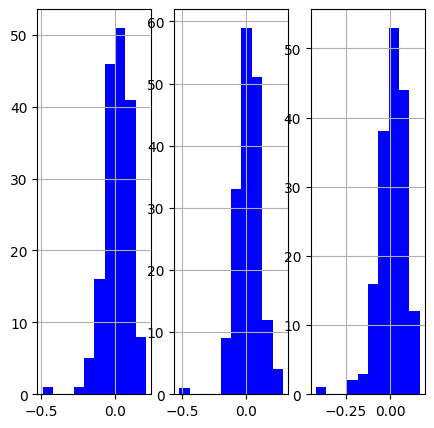

In [ ]:
plt.subplots(figsize=(5,5))
plt.subplot(131)
tcs_gwnMonthlyOutlier.hist(color='blue')
plt.subplot(132)
infy_gwnMonthlyOutlier.hist(color='blue')
plt.subplot(133)
bs100_gwnMonthlyOutlier.hist(color='blue')

In [ ]:
print(gwn_Daily.describe())
print("Variance:\n",gwn_Monthly.var())
print("Standard deviation:\n",gwn_Monthly.std())
print("Skewness:\n",gwn_Monthly.skew())
print("Kurtosis:\n",gwn_Monthly.kurt())

       tcs_gwnDaily  infosys_gwnDaily  bs100_gwnDaily
count   3489.000000       3489.000000     3489.000000
mean       0.001206          0.001371        0.000194
std        0.019411          0.019261        0.027688
min       -0.080205         -0.066925       -0.091105
25%       -0.012007         -0.011971       -0.018481
50%        0.000934          0.001127        0.000346
75%        0.014173          0.014369        0.019287
max        0.073929          0.066600        0.080057
Variance:
 tcs_gwnMonthly        0.008244
infosys_gwnMonthly    0.009250
bs100_gwnMonthly      0.005678
dtype: float64
Standard deviation:
 tcs_gwnMonthly        0.090798
infosys_gwnMonthly    0.096178
bs100_gwnMonthly      0.075350
dtype: float64
Skewness:
 tcs_gwnMonthly       -1.219409
infosys_gwnMonthly   -0.959225
bs100_gwnMonthly     -1.318262
dtype: float64
Kurtosis:
 tcs_gwnMonthly        5.023813
infosys_gwnMonthly    5.295792
bs100_gwnMonthly      5.372523
dtype: float64


Boxplot,
Sample Autocorrelation Plots,
Scatter plots,
pairs plot,
covariance ,
Correlation and 
Correlation plots

<function matplotlib.pyplot.show(*args, **kw)>

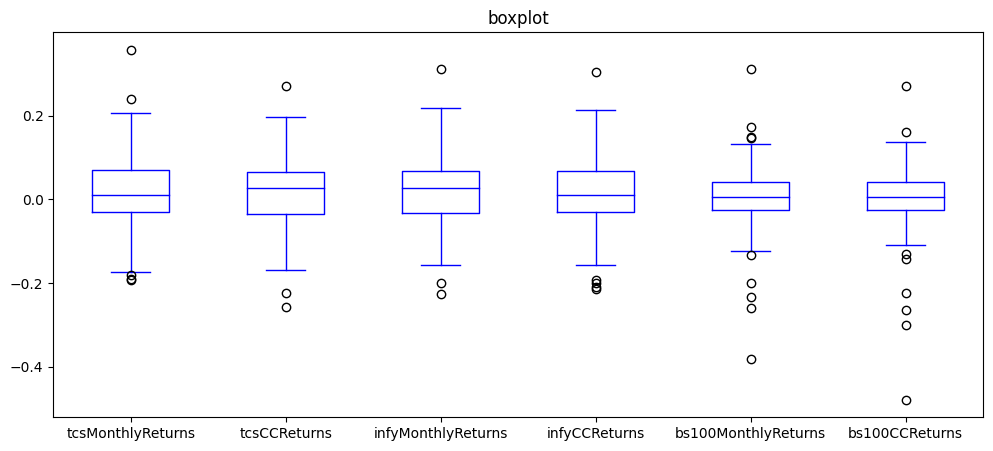

In [ ]:
#Boxplots
ax = monthly_data[['tcsMonthlyReturns','tcsCCReturns','infyMonthlyReturns','infyCCReturns','bs100MonthlyReturns','bs100CCReturns']].plot(kind='box', title='boxplot',figsize=(12,5),color='blue')
plt.show

In [ ]:
import statsmodels.api as sm
#tcs daily returns acf
acorr1 = sm.tsa.acf(daily_data.iloc[1:,4], nlags = 5 )
print(acorr1)
acorr2 = sm.tsa.acf(monthly_data.iloc[1:,4], nlags = 5 )
print(acorr2)

acorr3 = sm.tsa.acf(daily_data.iloc[1:,3], nlags = 5 )
print(acorr3)
acorr4 = sm.tsa.acf(monthly_data.iloc[1:,3], nlags = 5 )
print(acorr4)

acorr5 = sm.tsa.acf(daily_data.iloc[1:,5], nlags = 5 )
print(acorr3)
acorr6 = sm.tsa.acf(monthly_data.iloc[1:,5], nlags = 5 )
print(acorr6)




[ 1.         -0.00833754 -0.06472011 -0.0189883  -0.0013854   0.01636917]
[ 1.         -0.07830676  0.19051914  0.18383386 -0.0275984   0.06314231]
[ 1.         -0.26058777  0.02565378 -0.05872213 -0.05903961 -0.02044304]
[ 1.         -0.09989364 -0.00789588  0.052458   -0.08143831  0.07087473]
[ 1.         -0.26058777  0.02565378 -0.05872213 -0.05903961 -0.02044304]
[ 1.          0.11869037  0.00633359  0.06787399  0.13017552 -0.1377949 ]


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


autocorrelation plots

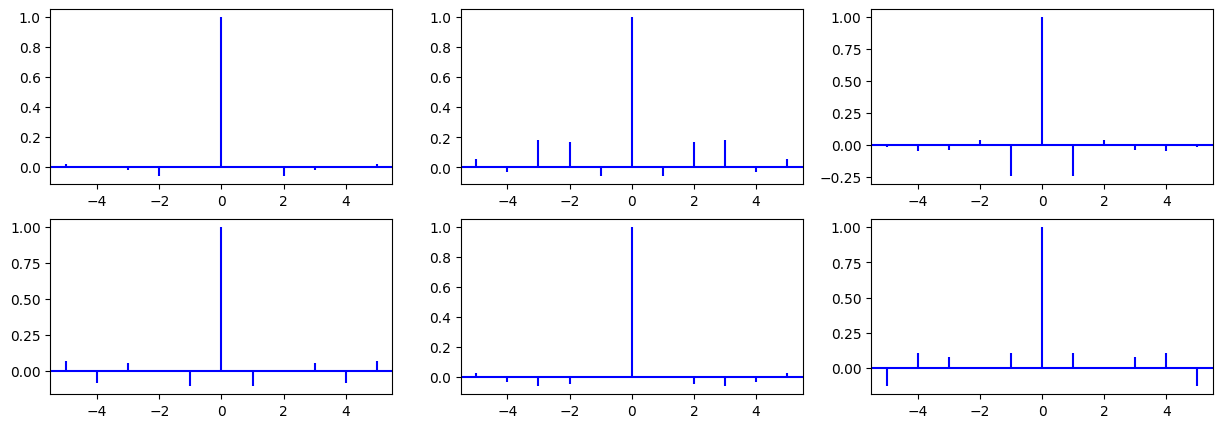

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(231)

plt.acorr(acorr1, maxlags = 5,color='blue')

plt.subplot(232)
plt.acorr(acorr2, maxlags = 5,color='blue')

plt.subplot(233)
plt.acorr(acorr3, maxlags = 5,color='blue')

plt.subplot(234)
plt.acorr(acorr4, maxlags = 5,color='blue')

plt.subplot(235)
plt.acorr(acorr5, maxlags = 5,color='blue')

plt.subplot(236)
plt.acorr(acorr6, maxlags = 5,color='blue')

plt.show()




In [ ]:
plt.subplots(figsize=(15,7))

plt.subplot(231)
plt.scatter(monthly_data["tcsMonthlyReturns"],monthly_data["infyMonthlyReturns"],color='blue')
plt.xlabel("TCS Monthly Returns")
plt.ylabel("Infosys Monthly Returns")

plt.subplot(232)
plt.scatter(monthly_data["bs100MonthlyReturns"],monthly_data["tcsMonthlyReturns"],color='blue')
plt.xlabel("BSE100 Monthly Returns")
plt.ylabel("TCS Monthly Returns")

plt.subplot(233)
plt.scatter(monthly_data["bs100MonthlyReturns"],monthly_data["infyMonthlyReturns"],color='blue')
plt.xlabel("BSE100 Monthly Returns")
plt.ylabel("Infosys Monthly Returns")

plt.subplot(234)
plt.scatter(daily_data["tcsDailyReturns"],daily_data["infyDailyReturns"],color='blue')
plt.xlabel("TCS Daily Returns")
plt.ylabel("Infosys Daily Returns")


plt.subplot(235)
plt.scatter(daily_data["bs100DailyReturns"],daily_data["tcsDailyReturns"],color='blue')
plt.xlabel("BSE100 Daily Returns")
plt.ylabel("TCS Daily Returns")

plt.subplot(236)
plt.scatter(daily_data["bs100DailyReturns"],daily_data["infyDailyReturns"],color='blue')
plt.xlabel("BSE100 Daily Returns")
plt.ylabel("Infosys Daily Returns")

plt.tight_layout(pad=5)

In [ ]:
sns.set_theme(style="ticks")
sns.pairplot(df)
plt.rcParams['figure.figsize']=(10,10)

In [ ]:
df.cov()

In [ ]:
df_daily.cov()

In [ ]:
df.corr()

In [ ]:
df_daily.corr()

In [ ]:
import seaborn as sns
 
# checking correlation using heatmap
#Loading dataset

 
#plotting the heatmap for correlation
ax = sns.heatmap(df.corr(), annot=True)